<a href="https://colab.research.google.com/github/cmannnn/mnist/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST classification

In [37]:
#imports
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd

import numpy as np

from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  cross_val_predict

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

Reading data

In [2]:
# reading in MNIST datasets
mnist_train = pd.read_csv('sample_data/mnist_train_small.csv')
mnist_test = pd.read_csv('sample_data/mnist_test.csv')

In [3]:
# checking training data shape
mnist_train.shape

(19999, 785)

In [4]:
# checking testing data shape
mnist_test.shape

(9999, 785)

# Splitting train data

In [5]:
# splitting train data into features and targets
mnist_train_y = mnist_train['6']
mnist_train_X = mnist_train.drop(['6'], axis=1)

In [6]:
# checking train y shape
mnist_train_y.shape

(19999,)

In [7]:
# checking train X shape
mnist_train_X.shape

(19999, 784)

# Splitting test data

In [8]:
# splitting test data into features and targets
mnist_test_y = mnist_test['7']
mnist_test_X = mnist_test.drop(['7'], axis=1)

In [9]:
# checking test y shape
mnist_test_y.shape

(9999,)

In [10]:
# checking test X shape
mnist_test_X.shape

(9999, 784)

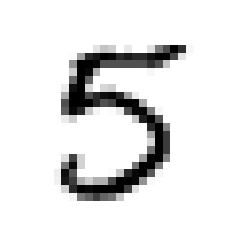

In [11]:
# displaying the image
some_digit = np.array(mnist_train_X[:1])
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [12]:
# checking target value
mnist_train_y[0]

5

# Training a binary classifier

In [13]:
# creating binary data set for a '#5 ditector' as binary classifer test
mnist_y_train_5 = (mnist_train_y == 5)
mnist_y_test_5 = (mnist_test_y ==5)

In [14]:
mnist_y_train_5

0         True
1        False
2        False
3         True
4        False
         ...  
19994    False
19995    False
19996    False
19997    False
19998     True
Name: 6, Length: 19999, dtype: bool

In [15]:
mnist_y_test_5

0       False
1       False
2       False
3       False
4       False
        ...  
9994    False
9995    False
9996    False
9997     True
9998    False
Name: 7, Length: 9999, dtype: bool

In [16]:
# Stochastic Gradient Discent
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(mnist_train_X, mnist_y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [17]:
# predicting if data == 5
sgd_clf.predict(some_digit)

array([ True])

Measuring score with cross-validation folds

In [18]:
# initiating cross folds
cross_val_score(sgd_clf, mnist_train_X, mnist_y_train_5, cv=3, scoring='accuracy')

array([0.96130193, 0.95829583, 0.96144614])

Measuring score with confusion matrix

In [19]:
# initiating cross val predictor
y_train_pred = cross_val_predict(sgd_clf, mnist_train_X, mnist_y_train_5, cv=3) 

In [20]:
# measuring confusion matrix
confusion_matrix(mnist_y_train_5, y_train_pred)

array([[17952,   286],
       [  507,  1254]])

Measuring precision and recall

In [21]:
# precision
precision_score(mnist_y_train_5, y_train_pred)

0.8142857142857143

In [22]:
# recall
recall_score(mnist_y_train_5, y_train_pred)

0.7120954003407155

Measuring f1 score

In [23]:
# measuring f1
f1_score(mnist_y_train_5, y_train_pred)

0.7597697667373522

Determining precision recall tradeoff

In [24]:
# using cross_val_predict part 2
y_scores = cross_val_predict(sgd_clf, mnist_train_X, mnist_y_train_5, cv=3, method='decision_function')

In [25]:
# creating precision recall curve
precisions, recalls, thresholds = precision_recall_curve(mnist_y_train_5, y_scores)

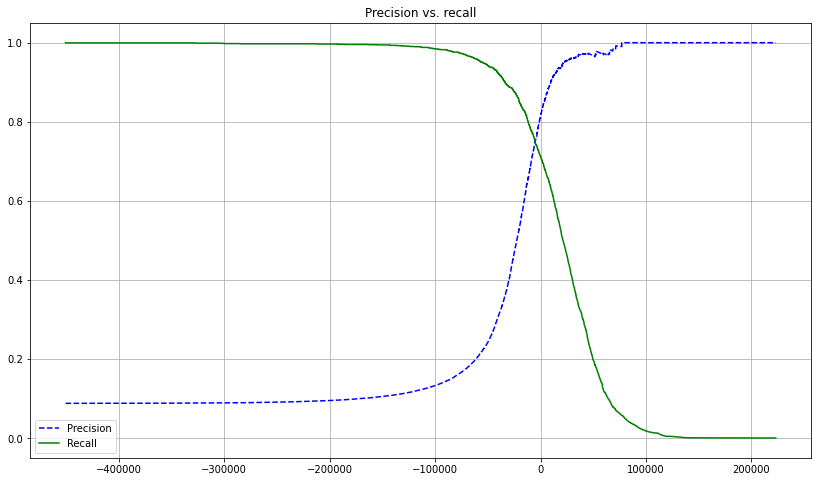

In [27]:
# plotting
fig, ax = plt.subplots(figsize=[14,8])

plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')

plt.grid()
plt.title('Precision vs. recall')
plt.legend()
plt.show()

In [28]:
# aiming for 90% precision with argmax
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [29]:
# checking predictions with 90& precision
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [35]:
# checking predictions precision score
precision_score(mnist_y_train_5, y_train_pred_90)

0.9005658852061439

In [36]:
# checing precitions recall score
recall_score(mnist_y_train_5, y_train_pred_90)

0.6325951164111301

ROC curve

In [38]:
# calculating false positive, true positive, and thresholds
fpr, tpr, thresholds = roc_curve(mnist_y_train_5, y_scores)

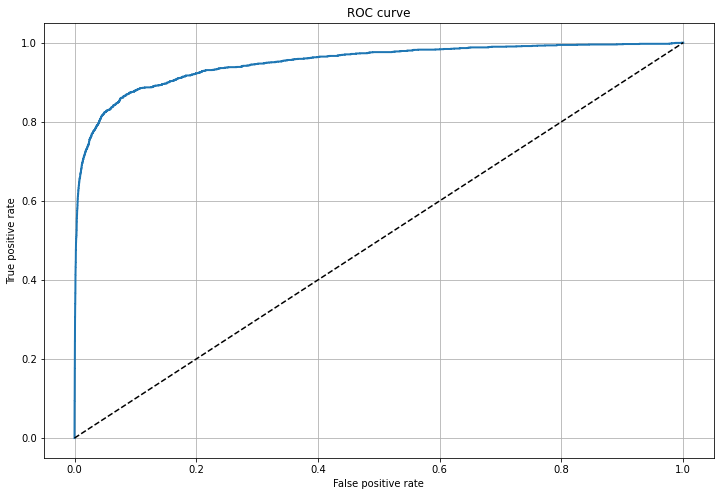

In [45]:
# plotting the ROC curve
fig, ax = plt.subplots(figsize=[12, 8])
plt.plot(fpr, tpr, linewidth=2, label=None)
plt.plot([0, 1], [0, 1], 'k--')

plt.grid()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()